In [74]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import time
from pytz import timezone
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from matplotlib.dates import DateFormatter


In [2]:
data_dir = '/Users/Karolina/ProjectsDataScience/data_science_environment/data/'
file_list = ['MyDataSpotify/StreamingHistory1.json',
             'MyDataSpotify/StreamingHistory2.json',
             'MyDataSpotify/StreamingHistory3.json',
             'MyDataSpotify/StreamingHistory4.json']

dfs = [] # an empty list to store the data frames
for file in file_list:
    data = pd.read_json(data_dir+file) # read data frame from json file
    dfs.append(data) # append the data frame to the list

df = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

In [3]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2021-01-23 14:36,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
1,2021-01-23 14:39,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
2,2021-01-23 14:43,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
3,2021-01-23 14:46,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464
4,2021-01-23 14:50,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37735 entries, 0 to 37734
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     37735 non-null  object
 1   artistName  37735 non-null  object
 2   trackName   37735 non-null  object
 3   msPlayed    37735 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df.endTime = pd.to_datetime(df.endTime, infer_datetime_format=True) 

#Set the current time to US Pacific timezone
df['endTimeTz']= df.endTime.dt.tz_localize(tz='UTC')

#convert US Pacific to Europe/Berlin Timezone
df['endTimeTzEU']=df.endTimeTz.dt.tz_convert(tz='Europe/Berlin')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37735 entries, 0 to 37734
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype                        
---  ------       --------------  -----                        
 0   endTime      37735 non-null  datetime64[ns]               
 1   artistName   37735 non-null  object                       
 2   trackName    37735 non-null  object                       
 3   msPlayed     37735 non-null  int64                        
 4   endTimeTz    37735 non-null  datetime64[ns, UTC]          
 5   endTimeTzEU  37735 non-null  datetime64[ns, Europe/Berlin]
dtypes: datetime64[ns, Europe/Berlin](1), datetime64[ns, UTC](1), datetime64[ns](1), int64(1), object(2)
memory usage: 1.7+ MB


In [124]:
df['hour'] = df.endTimeTzEU.dt.hour
df['date'] = df['endTime'].dt.to_period('D').apply(lambda r: r.start_time)
df['week'] = df['endTime'].dt.to_period('W').apply(lambda r: r.start_time)
df['month'] = df['endTimeTzEU'].dt.to_period('M').apply(lambda r: r.start_time)


df['sPlayed'] = df['msPlayed']/(1000)
df['mPlayed'] = df['sPlayed']/(60)
df['hPlayed'] = df['sPlayed']/(60*60)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [125]:
df.head()

,endTime,artistName,trackName,msPlayed,endTimeTz,endTimeTzEU,hour,month,sPlayed,mPlayed,hPlayed,date,week
0,2021-01-23 14:36:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:36:00+00:00,2021-01-23 15:36:00+01:00,15,2021-01-01,203.464,3.391067,0.056518,2021-01-23,2021-01-18
1,2021-01-23 14:39:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:39:00+00:00,2021-01-23 15:39:00+01:00,15,2021-01-01,203.464,3.391067,0.056518,2021-01-23,2021-01-18
2,2021-01-23 14:43:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:43:00+00:00,2021-01-23 15:43:00+01:00,15,2021-01-01,203.464,3.391067,0.056518,2021-01-23,2021-01-18
3,2021-01-23 14:46:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:46:00+00:00,2021-01-23 15:46:00+01:00,15,2021-01-01,203.464,3.391067,0.056518,2021-01-23,2021-01-18
4,2021-01-23 14:50:00,Billie Eilish,Lo Vas A Olvidar (with ROSALÍA),203464,2021-01-23 14:50:00+00:00,2021-01-23 15:50:00+01:00,15,2021-01-01,203.464,3.391067,0.056518,2021-01-23,2021-01-18


In [131]:
summ = pd.DataFrame(df.groupby(['date','hour'])['mPlayed'].sum().reset_index())
summ
avg = pd.DataFrame(summ.groupby('hour')['mPlayed'].mean())
avg

,mPlayed
hour,
0,16.894167
1,19.592525
2,20.606514
3,19.697700
4,16.330692
5,26.581344
6,17.296398
7,26.544645
8,32.154216


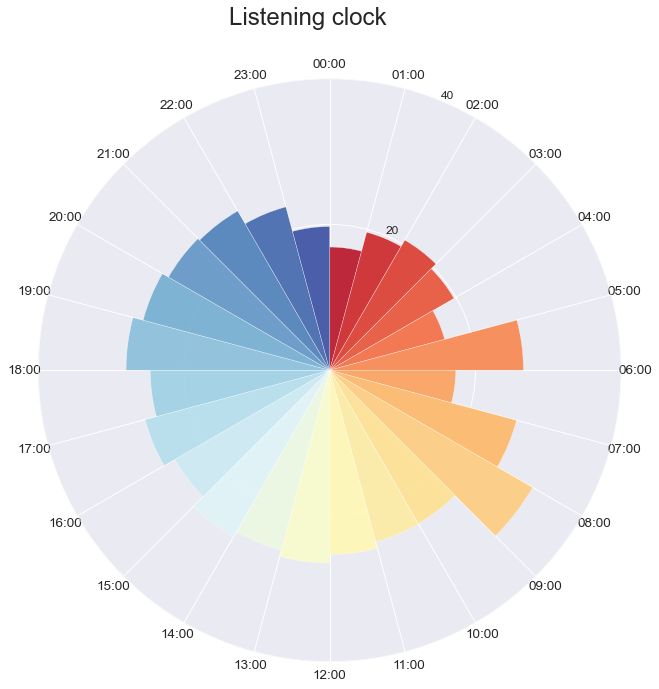

In [133]:
plt.style.use("seaborn")
#plt.style.use('Solarize_Light2')

fig = plt.figure(figsize = (20, 10))
ax = plt.subplot(111, polar=True)


equals = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones = np.ones(24)
width=(2*np.pi)/24
palette = sns.color_palette("RdYlBu", 24)
ax.bar(np.deg2rad(equals), avg.mPlayed, width=width,  alpha=0.9, color=palette, align='edge', edgecolor='white')       

# Set the circumference labels and its format
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
labels = [time(i, 0).strftime("%H:%M") for i in avg.index]
ax.set_xticklabels(labels, size=13.5)   



# Set the radial labels and size
ax.set_rgrids([20,40], fontsize=12)

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       

fig.suptitle('Listening clock', size=24)

plt.show()

In [135]:
summ = pd.DataFrame(df.groupby(['date','hour'])['trackName'].size().reset_index())
summ
avg = pd.DataFrame(summ.groupby('hour')['trackName'].mean())
avg

,trackName
hour,
0,8.130435
1,6.833333
2,7.166667
3,6.000000
4,5.000000
5,9.666667
6,9.280000
7,13.975460
8,13.493392


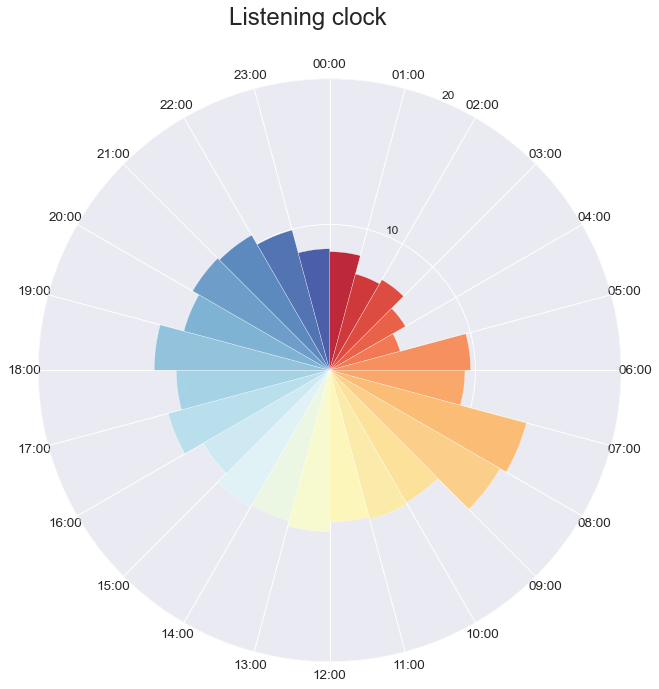

In [136]:
plt.style.use("seaborn")
#plt.style.use('Solarize_Light2')

fig = plt.figure(figsize = (20, 10))
ax = plt.subplot(111, polar=True)


equals = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones = np.ones(24)
width=(2*np.pi)/24
palette = sns.color_palette("RdYlBu", 24)
ax.bar(np.deg2rad(equals), avg.trackName, width=width,  alpha=0.9, color=palette, align='edge', edgecolor='white')       

# Set the circumference labels and its format
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
labels = [time(i, 0).strftime("%H:%M") for i in avg.index]
ax.set_xticklabels(labels, size=13.5)   



# Set the radial labels and size
ax.set_rgrids([10,20], fontsize=12)

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       

fig.suptitle('Listening clock', size=24)

plt.show()

In [137]:
avg = pd.DataFrame(df.groupby('hour')['trackName'].size())
avg

,trackName
hour,
0,187
1,41
2,43
3,30
4,20
5,29
6,464
7,2278
8,3063


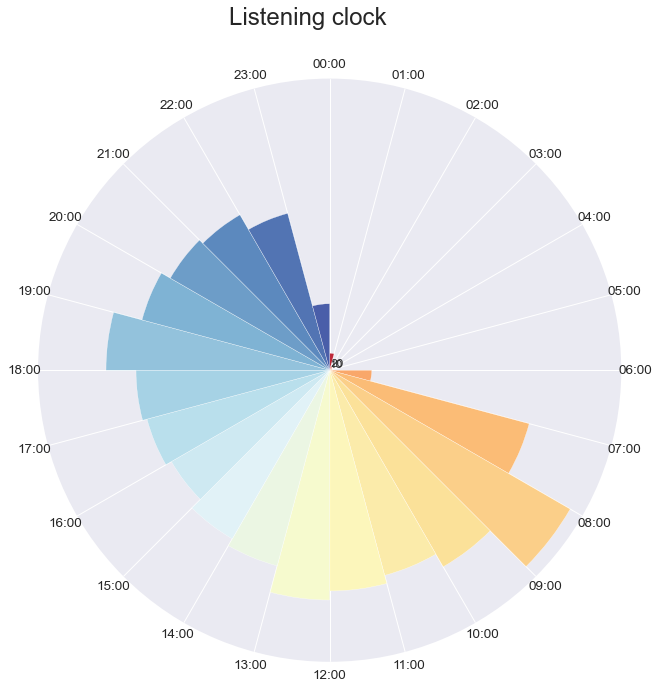

In [138]:
plt.style.use("seaborn")
#plt.style.use('Solarize_Light2')

fig = plt.figure(figsize = (20, 10))
ax = plt.subplot(111, polar=True)


equals = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones = np.ones(24)
width=(2*np.pi)/24
palette = sns.color_palette("RdYlBu", 24)
ax.bar(np.deg2rad(equals), avg.trackName, width=width,  alpha=0.9, color=palette, align='edge', edgecolor='white')       

# Set the circumference labels and its format
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
labels = [time(i, 0).strftime("%H:%M") for i in avg.index]
ax.set_xticklabels(labels, size=13.5)   



# Set the radial labels and size
ax.set_rgrids([10,20], fontsize=12)

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       

fig.suptitle('Listening clock', size=24)

plt.show()